# 1. Project setup

### Import required libraries

In [23]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pikyl
import matplotlib.pyplot as plt

### Import games.csv

In [24]:
games = pd.read_csv('games.csv')
games

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Fishing Planet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2328,Obduction,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2329,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
2330,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


# 2. Data exploration

### View rating categories distribution

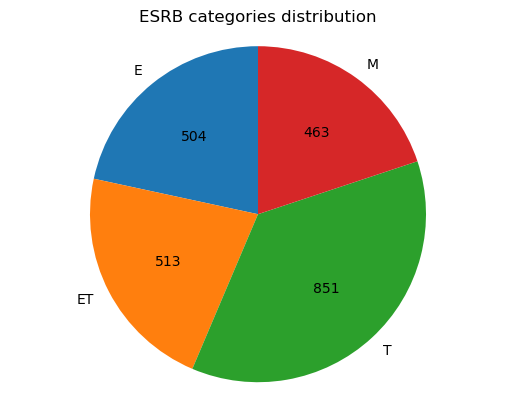

In [25]:
# Define the custom order for graphs
order = ['E', 'ET', 'T', 'M']

# Count occurrences of each category
counts = games['esrb_rating'].value_counts().reindex(order, fill_value=0)

# Create a pie chart
plt.pie(counts, labels=counts.index, startangle=90, autopct=lambda p: '{:,}'.format(int(p*sum(counts)/100)))

plt.title('ESRB categories distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

In [26]:
def plot_distribution(attribute):
    order = ['E', 'ET', 'T', 'M']

    # Calculate the percentage of games with and without "violence" for each ESRB rating category
    percentage_data = pd.crosstab(games['esrb_rating'], games[attribute], normalize='index') * 100

    # Reorder the rows of the DataFrame based on the desired order of ESRB ratings: E, ET, T, M
    ax = percentage_data.loc[order].plot(kind='bar', stacked=True, rot=0)

    plt.title(f'"{attribute}" distribution across ESRB ratings')
    plt.ylabel('Percentage of games')
    ax.legend(['No', 'Yes'], loc='lower right')

    plt.show()

### View violence distribution

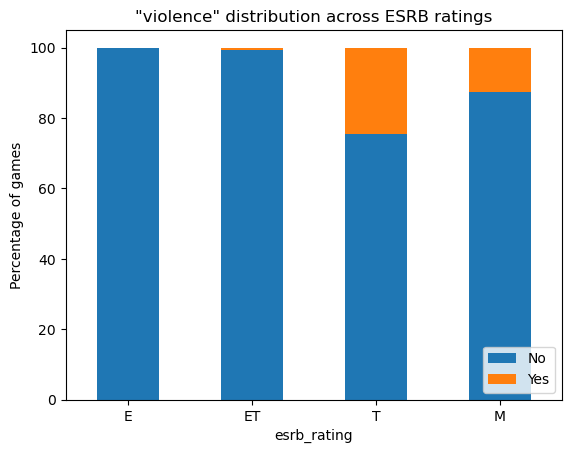

In [27]:
plot_distribution('violence')

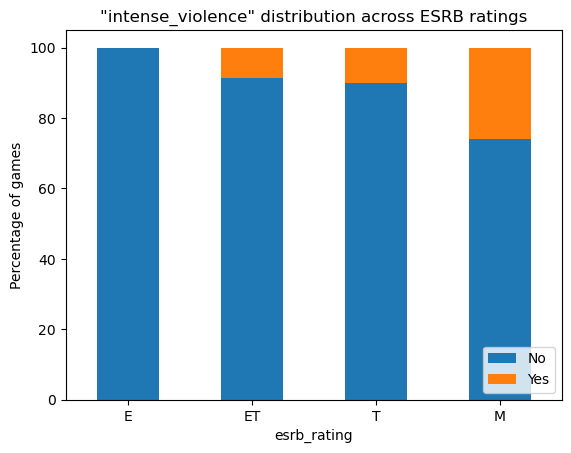

In [28]:
plot_distribution('intense_violence')

### View inappropriate language distribution

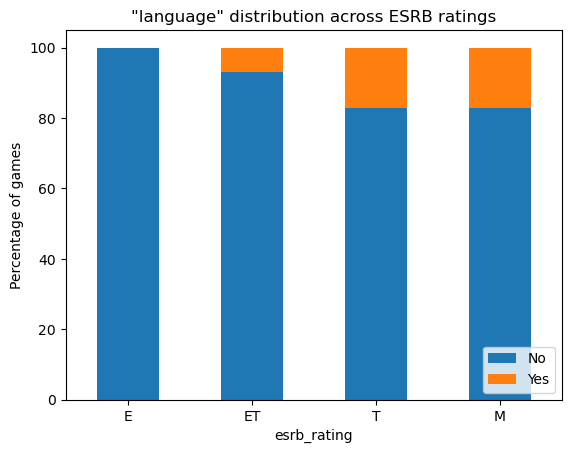

In [29]:
plot_distribution('language')

### "no_descriptors" distribution

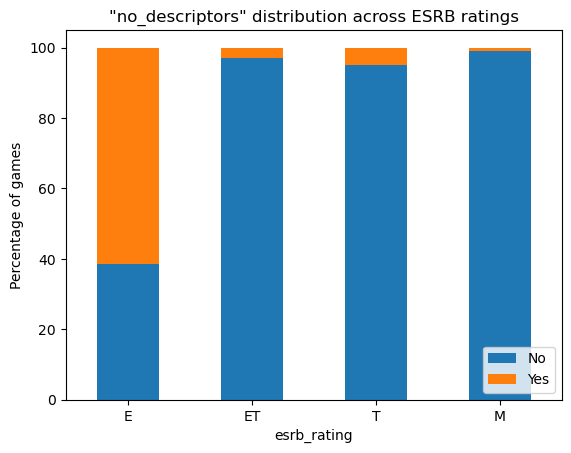

In [30]:
plot_distribution('no_descriptors')

### Games rated "M" without descriptors

In [31]:
filtered_games = games[(games['esrb_rating'] == 'M') & (games['no_descriptors'] == 1)]
print(filtered_games[['title']])

            title
752      Maneater
1113  Observation
1167      Tharsis
1856    Frostpunk


### "sexual_content" distribution

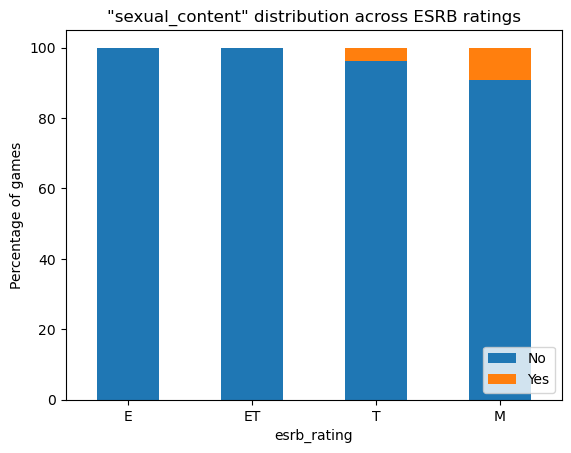

In [32]:
plot_distribution('sexual_content')

### Games rated "T" that have sexual content

In [33]:
filtered_rows = games[(games['sexual_content'] == 1) & (games['esrb_rating'] == 'T')]
print(filtered_rows['title'])

212                                              Pox Nora
328                                    Dark Rose Valkyrie
338                                      Thimbleweed Park
459                                            Toukiden 2
488                                     Tales of Berseria
501                                           Blightbound
556     THE KING OF FIGHTERS™ COLLECTION: THE OROCHI SAGA
563            Prince of Persia: The Sands of Time Remake
564                                       Shadows of Adam
588                                   ROBOTICS;NOTES DaSH
613                                                  Yaga
703                                             Mutazione
789                     SAMURAI SHODOWN NEOGEO COLLECTION
802                                 Shikhondo: Soul Eater
871                      Ancestors: The Humankind Odyssey
1161                                      Sword & Fairy 6
1247                   Bloodstained:  Ritual of the Night
1343          

### Correlation matrix

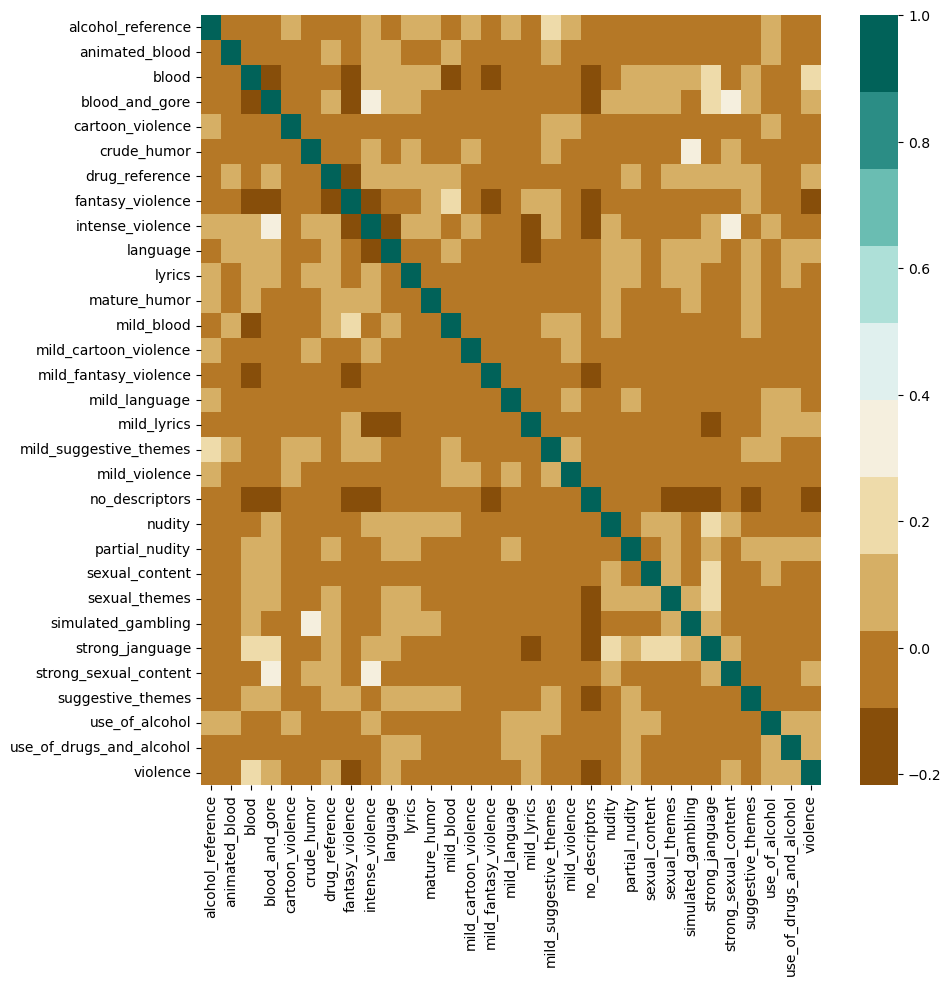

In [34]:
# Drop columns irrevelant to correlation matrix
correlations_df = games.drop(['title', 'console', 'esrb_rating'], axis=1)

# Calculate the correlation matrix
correlations = correlations_df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(correlations, cmap=colormap)
ax.set_yticklabels(correlations_df.columns)

plt.show()

# 3. Data preparation

### Remove columns: "title" & "console" as they are not relevant to ESRB rating

In [35]:
games.drop(['title', 'console'], axis = 1, inplace = True)
games.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET


### Apply one-hot encoding to "esrb_rating" column (in order to extract binary values)

In [36]:
games = pd.get_dummies(games, columns=['esrb_rating'], prefix='esrb_rating')
games = games.astype(int)
games.iloc[:, -4:].head()

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,1,0,0


### Preparing features and target labels for multi-class classification

In [37]:
X = games.drop(['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_T', 'esrb_rating_M'], axis=1).to_numpy()
y = games.loc[:, ['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_T', 'esrb_rating_M']].to_numpy()

In [38]:
X

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [40]:
y = np.argmax(y, axis=1)
y[:10]

array([2, 0, 2, 0, 1, 3, 3, 1, 0, 2])

### Split the data for training and validation

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

In [42]:
X_train

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [44]:
y_train

array([2, 0, 3, ..., 3, 2, 3])

In [45]:
y_test

array([1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3, 2, 3,
       2, 0, 2, 2, 1, 2, 2, 0, 1, 3, 3, 0, 1, 2, 0, 2, 2, 2, 2, 3, 1, 0,
       1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 3, 1, 0, 3, 2, 3, 3, 2, 2, 3, 0,
       2, 1, 3, 3, 2, 1, 1, 1, 3, 0, 3, 0, 1, 3, 2, 2, 1, 1, 2, 1, 0, 3,
       2, 0, 3, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1,
       2, 0, 0, 3, 3, 1, 2, 0, 1, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 3, 1, 1,
       0, 2, 2, 2, 3, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 3, 3,
       2, 3, 0, 1, 0, 2, 3, 0, 1, 1, 2, 2, 1, 3, 2, 3, 1, 0, 2, 3, 3, 2,
       1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 3, 2, 2, 1, 1, 2, 0, 1, 3, 2, 2, 2,
       3, 2, 3, 2, 2, 1, 0, 1, 2, 3, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 2, 3, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 1, 3,
       2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 3, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 2, 0, 1, 0, 0, 2, 3, 2, 2, 2, 2, 1, 3, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 0, 3, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,

### Create a custom "game" for testing purposes

In [46]:
custom_example = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

# 4. Training and evaluation of models

### Universal method for training and evaluation

In [47]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

### Model #1 - Logistic Regression

In [ ]:
lr_params_1 = {
    'penalty': 'l2',
    'C': 0.20,
    'random_state': 42
}

lr_params_2 = {
    'penalty': 'l2',
    'C': 0.25,
    'random_state': 42
}

lr_params_3 = {
    'penalty': 'l2',
    'C': 0.01,
    'random_state': 42
}

accuracy_compare = {}
accuracy_compareLR = {}

# Default
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compareLR['LR'] = accuracy
print("LR", accuracy)

# Experiment 1
accuracy = train_model(linear_model.LogisticRegression(**lr_params_1), X_train, y_train, X_test)
accuracy_compareLR['LRx1'] = accuracy
print("LRx1", accuracy)

# Experiment 2
accuracy = train_model(linear_model.LogisticRegression(**lr_params_2), X_train, y_train, X_test)
accuracy_compareLR['LRx2'] = accuracy
accuracy_compare['LRx2'] = accuracy  # adding to final comparison (best score)
print("LRx2", accuracy)

# Experiment 3
accuracy = train_model(linear_model.LogisticRegression(**lr_params_3), X_train, y_train, X_test)
accuracy_compareLR['LRx3'] = accuracy
print("LRx3", accuracy)

# Create a DataFrame for comparison
df_compareLR = pd.DataFrame(accuracy_compareLR, index=['precision', 'recall', 'f1 score', 'accuracy'])

# Plot the comparison
ax = df_compareLR.plot(kind='bar', legend='reverse') 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=True, shadow=True, ncol=len(df_compareLR.columns))
plt.ylabel('Score')
plt.title('Comparison of Logistic Regression Models')
plt.show()


### Model #2 - Support Vector Machine

In [ ]:
svm_params_1 = {
    'C': 1,
    'kernel': 'rbf',  # Radial basis function (RBF) kernel
    'gamma': 'scale', # defines how far the influence of a single training example reaches.
    'random_state': 42,
    'degree': 10
}

svm_params_2 = {
    'C': 2.0,
    'kernel': 'linear',  # Linear kernel
    'random_state': 42,
}

svm_params_3 = {
    'C': 1,
    'kernel': 'poly',  # Polynomial kernel
    'degree': 5,  # Polynomial degree
    'gamma': 'scale', 
    'random_state': 42,
}

accuracy_compareSVM = {}

# Default
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compareSVM['SVM'] = accuracy
print("SVM", accuracy)

# Experiment 1
accuracy = train_model(svm.SVC(**svm_params_1), X_train, y_train, X_test)
accuracy_compareSVM['SVMx1'] = accuracy
accuracy_compare['SVMx1'] = accuracy
print("SVMx1", accuracy)

# Experiment 2
accuracy = train_model(svm.SVC(**svm_params_2), X_train, y_train, X_test)
accuracy_compareSVM['SVMx2'] = accuracy
print("SVMx2", accuracy)

# Experiment 3
accuracy = train_model(svm.SVC(**svm_params_3), X_train, y_train, X_test)
accuracy_compareSVM['SVMx3'] = accuracy
print("SVMx3", accuracy)

df_compareSVM = pd.DataFrame(accuracy_compareSVM, index=['precision', 'recall', 'f1 score', 'accuracy'])

ax = df_compareSVM.plot(kind='bar', legend='reverse') 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=True, shadow=True, ncol=len(df_compareSVM.columns))
plt.ylabel('Score')
plt.title('Comparison of Support Vector Machine Models')
plt.show()

### Model #3 - Random Forest Tree

In [ ]:
# Experiment 1
rf_params_1 = {
    'n_estimators': 25000,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'random_state': 42
}

# Experiment 2
rf_params_2 = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'log2',
    'random_state': 42
}

# Experiment 3
rf_params_3 = {
    'n_estimators': 15000,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42
}

accuracy_compareRF = {}

accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compareRF = {'RF': accuracy}
print("RF" , accuracy)

accuracy = train_model(ensemble.RandomForestClassifier(**rf_params_1), X_train, y_train, X_test)
accuracy_compareRF['RFx1'] = accuracy
print("RFx1" , accuracy)

accuracy = train_model(ensemble.RandomForestClassifier(**rf_params_2), X_train, y_train, X_test)
accuracy_compareRF['RFx2'] = accuracy
print("RFx2" , accuracy)

accuracy = train_model(ensemble.RandomForestClassifier(**rf_params_3), X_train, y_train, X_test)
accuracy_compareRF['RFx3'] = accuracy
accuracy_compare['RFx3'] = accuracy # adding to final comparison (best score)
print("RFx3" , accuracy)

df_compare = pd.DataFrame(accuracy_compareRF, index=['precision', 'recall', 'f1 score', 'accuracy'])

ax = df_compare.plot(kind='bar', legend='reverse') 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=True, shadow=True, ncol=len(df_compare.columns))
plt.ylabel('Score')
plt.title('Comparison of RF Models')
plt.show()

### Model #4 - Neural Network

In [ ]:
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'max_iter': [500, 1000, 1500],
}

# Create an MLP classifier
mlp = MLPClassifier()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_mlp = MLPClassifier(**best_params)
accuracy = train_model(best_mlp, X_train, y_train, X_test)
accuracy_compare['neural_network'] = accuracy
print("Neural Network:", accuracy)

In [ ]:
df_compare = pd.DataFrame(accuracy_compare, index=['precision', 'recall', 'f1 score', 'accuracy'])

ax = df_compare.plot(kind='bar', legend='reverse') 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=True, shadow=True, ncol=len(df_compare.columns))
plt.ylabel('Score')
plt.title('Final Comparison of Models')
plt.show()

# 5. Export the best model to file

In [ ]:
best = svm.SVC()
best.fit(X_train, y_train) # train

with open('esrb-model.pkl', 'wb') as file: # export
    pikyl.dump(best, file)